In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
input_folder = '/content/drive/MyDrive/Skripsi/Data/Raw/Raw'
output_folder = '/content/drive/MyDrive/Skripsi/Data/Raw/Raw_Vflip+1.8'

os.makedirs(output_folder, exist_ok=True)

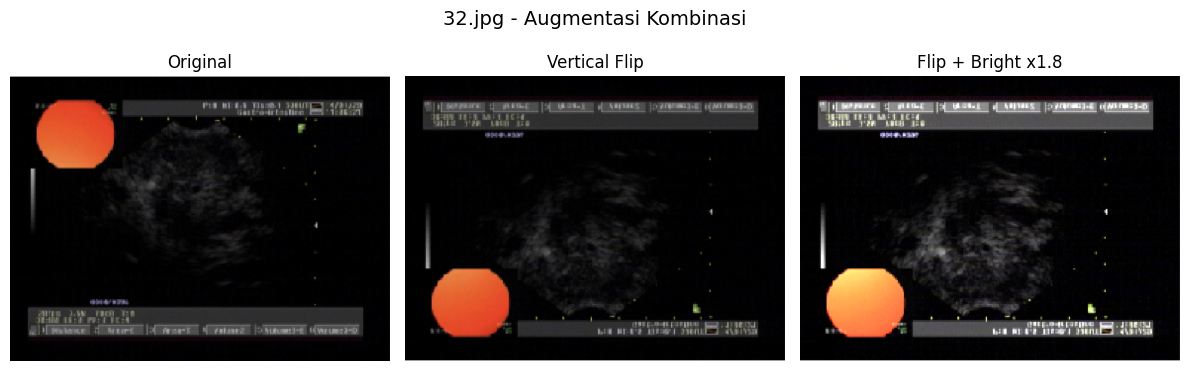

In [4]:
# Fungsi vertical flip
def vertical_flip(image):
    return image.transpose(Image.FLIP_TOP_BOTTOM)

# Fungsi adjust brightness
def adjust_brightness(image, factor):
    img_array = np.array(image).astype(np.float32) * factor
    img_array = np.clip(img_array, 0, 255).astype(np.uint8)
    return Image.fromarray(img_array)

displayed = False

for filename in os.listdir(input_folder):
    if filename.lower().endswith('.jpg'):
        basename = os.path.splitext(filename)[0]

        img = Image.open(os.path.join(input_folder, filename)).convert('RGB')

        # Augmentasi: vertical flip + brightness x1.8
        img_vflip = vertical_flip(img)
        img_bright = adjust_brightness(img_vflip, 1.8)

        # Menyimpan hasil augmentasi
        output_path = os.path.join(output_folder, f"{basename}_vflip_bright18.jpg")
        img_bright.save(output_path)

        # Menampilkan hanya satu kali
        if not displayed:
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 3, 1)
            plt.imshow(img)
            plt.title("Original")
            plt.axis("off")

            plt.subplot(1, 3, 2)
            plt.imshow(img_vflip)
            plt.title("Vertical Flip")
            plt.axis("off")

            plt.subplot(1, 3, 3)
            plt.imshow(img_bright)
            plt.title("Flip + Bright x1.8")
            plt.axis("off")

            plt.suptitle(f"{filename} - Augmentasi Kombinasi", fontsize=14)
            plt.tight_layout()
            plt.show()

            displayed = True